In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os.path

from os import getcwd
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
import math
from scipy.fftpack import fft, ifft
from scipy.stats import zscore, f_oneway
#import samplerate
import multiprocessing as mp
from scipy.signal import resample
import random
import pyreadr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score

import scipy.cluster.hierarchy as hac 


In [114]:
summary_table = pd.read_csv("cue_speech_encoding_unit_label.csv")
summary_table = summary_table.rename(columns={'Auditory.1': 'Auditory', 'Speech.1': 'Speech'})

summary_table

,Unit ID,Subject,Auditory,Speech,Auditory,Speech
0,28,DBS3003,V,G,-,-
1,30,DBS3003,-,-,I,I A
2,36,DBS3003,-,-,A U,A U
3,122,DBS3015,S,S T,-,-
4,129,DBS3018,-,S,I,I
5,176,DBS3024,G S,-,A,A
6,184,DBS3027,T,T,-,-
7,185,DBS3027,-,-,U,U A
8,189,DBS3027,S V,S T,-,-
9,199,DBS3028,V,V G,A,A U


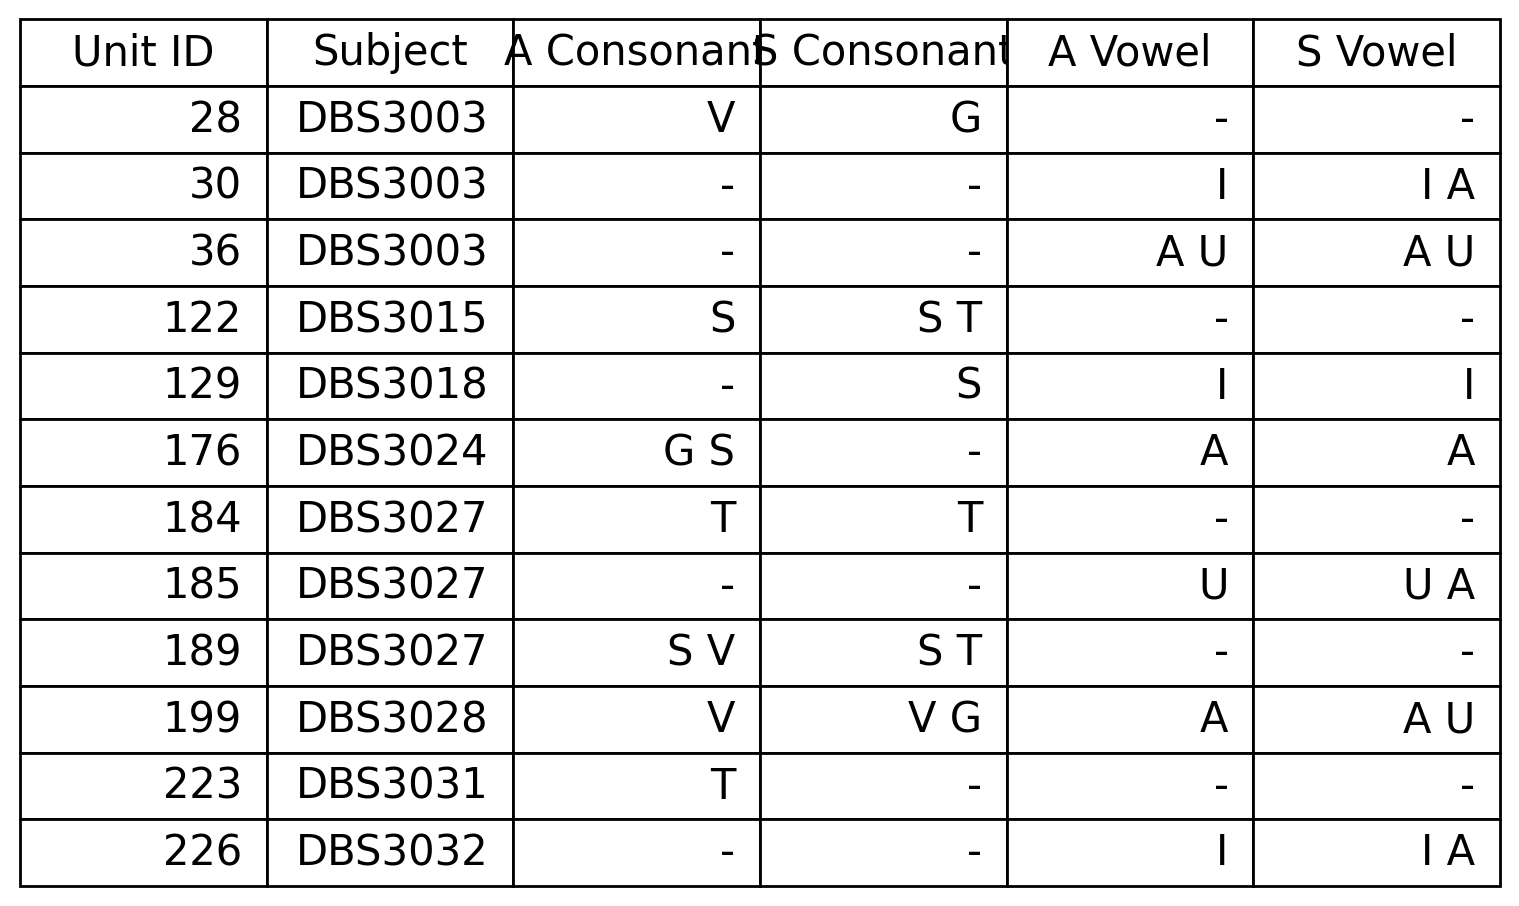

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(4, 3), dpi=200, constrained_layout=True)
# hide axes
fig.patch.set_visible(False)
axs.axis('off')
axs.axis('tight')
fig.tight_layout()

table = axs.table(cellText=summary_table.values, colLabels=summary_table.columns, 
          loc='center')
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(2, 2)

plt.show();

In [23]:
summary_table = pd.read_csv("cue_speech_encoding_unit_label2.csv", header=[0,1])
summary_table

Unit  Subject Consonant           Vowel       
     ID       ID  Auditory Speech Auditory Speech
0    28  DBS3003         V      G        -      -
1    30  DBS3003         -      -        I    I A
2    36  DBS3003         -      -      A U    A U
3   122  DBS3015         S    S T        -      -
4   129  DBS3018         -      S        I      I
5   176  DBS3024       G S      -        A      A
6   184  DBS3027         T      T        -      -
7   185  DBS3027         -      -        U    U A
8   189  DBS3027       S V    S T        -      -
9   199  DBS3028         V    V G        A    A U
10  223  DBS3031         T      -        -      -
11  226  DBS3032         -      -        I    I A

In [66]:
import matplotlib as mpl

def mergecells(table, ix0, ix1):
    ix0,ix1 = np.asarray(ix0), np.asarray(ix1)
    d = ix1 - ix0
    if not (0 in d and 1 in np.abs(d)):
        raise ValueError("ix0 and ix1 should be the indices of adjacent cells. ix0: %s, ix1: %s" % (ix0, ix1))

    if d[0]==-1:
        edges = ('BRL', 'TRL')
    elif d[0]==1:
        edges = ('TRL', 'BRL')
    elif d[1]==-1:
        edges = ('BTR', 'BTL')
    else:
        edges = ('BTL', 'BTR')

    # hide the merged edges
    for ix,e in zip((ix0, ix1), edges):
        table[ix[0], ix[1]].visible_edges = e

    txts = [table[ix[0], ix[1]].get_text() for ix in (ix0, ix1)]
    tpos = [np.array(t.get_position()) for t in txts]

    # center the text of the 0th cell between the two merged cells
    trans = (tpos[1] - tpos[0])/2
    if trans[0] > 0 and txts[0].get_ha() == 'right':
        # reduce the transform distance in order to center the text
        trans[0] /= 2
    elif trans[0] < 0 and txts[0].get_ha() == 'right':
        # increase the transform distance...
        trans[0] *= 2

    txts[0].set_transform(mpl.transforms.Affine2D().translate(*trans))

    # hide the text in the 1st cell
    txts[1].set_visible(False)

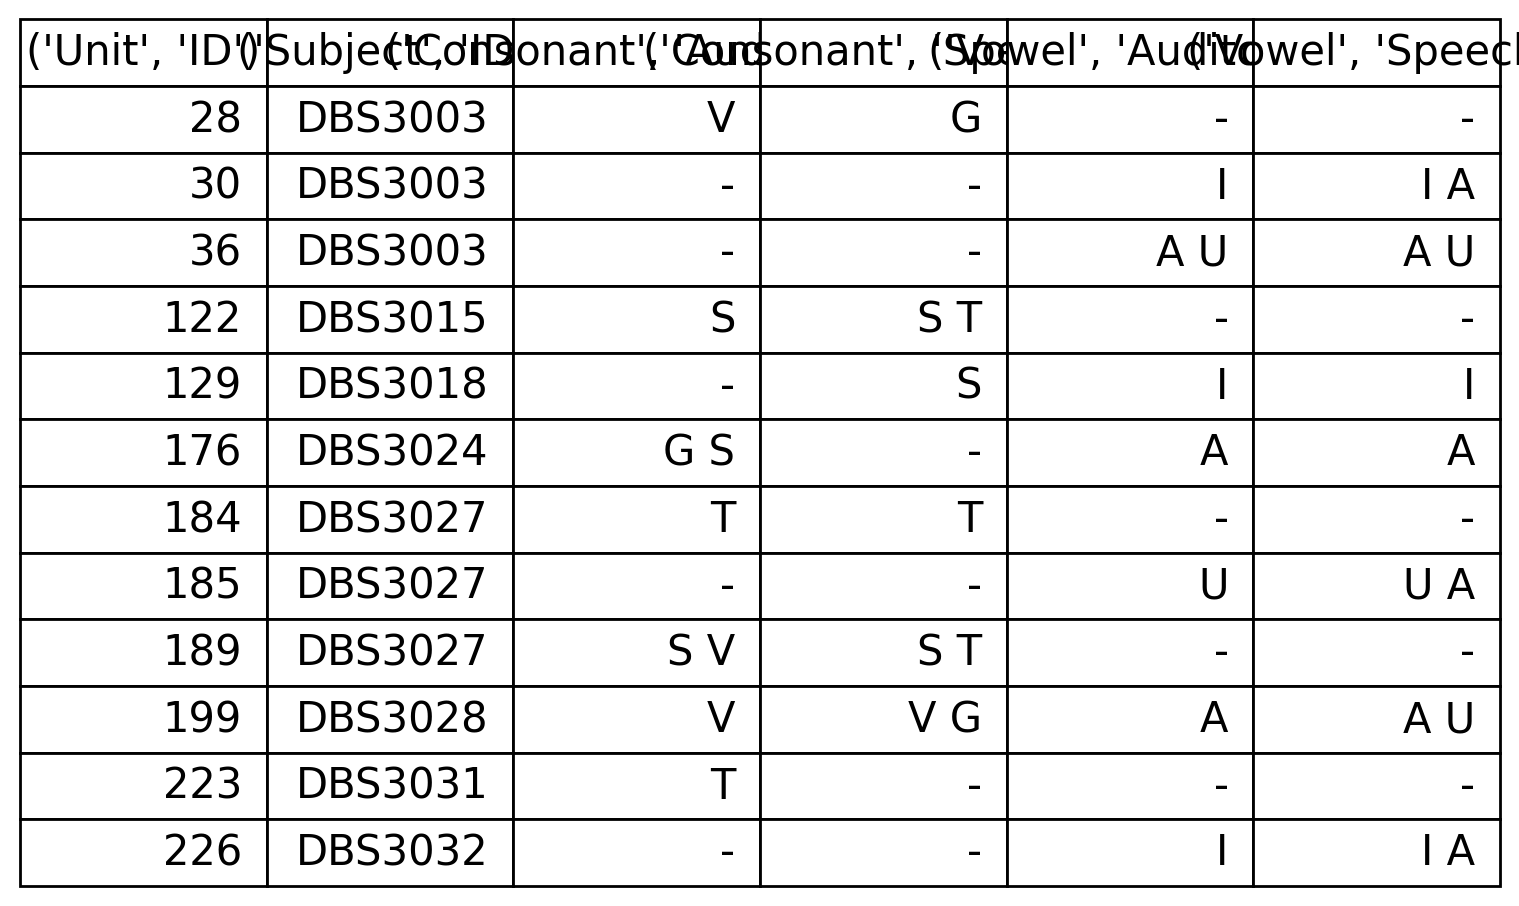

In [34]:
fig, axs = plt.subplots(1, 1, figsize=(4, 3), dpi=200, constrained_layout=True)
# hide axes
fig.patch.set_visible(False)
axs.axis('off')
axs.axis('tight')
fig.tight_layout()
axs.table(cellColours=[['lightgray']] + [['none']], bbox=[0,0,1,1])

table = axs.table(cellText=summary_table.values, colLabels=summary_table.columns, 
          loc='center')
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(2, 2)

plt.show();

(0.0, 1.0, 0.0, 1.0)

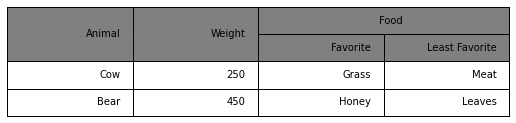

In [27]:

df = pd.DataFrame()
df['Animal'] = ['Cow', 'Bear']
df['Weight'] = [250, 450]
df['Favorite'] = ['Grass', 'Honey']
df['Least Favorite'] = ['Meat', 'Leaves']

fig = plt.figure(figsize=(9,2))
ax=fig.gca()
ax.axis('off')
r,c = df.shape

# ensure consistent background color
ax.table(cellColours=[['lightgray']] + [['none']], bbox=[0,0,1,1])

# plot the real table
table = ax.table(cellText=np.vstack([['', '', 'Food', ''], df.columns, df.values]), 
                 cellColours=[['none']*c]*(2 + r), bbox=[0, 0, 1, 1])

# need to draw here so the text positions are calculated
fig.canvas.draw()

# do the 3 cell merges needed
mergecells(table, (1,0), (0,0))
mergecells(table, (1,1), (0,1))
mergecells(table, (0,2), (0,3))

In [33]:
df.columns

Index(['Animal', 'Weight', 'Favorite', 'Least Favorite'], dtype='object')

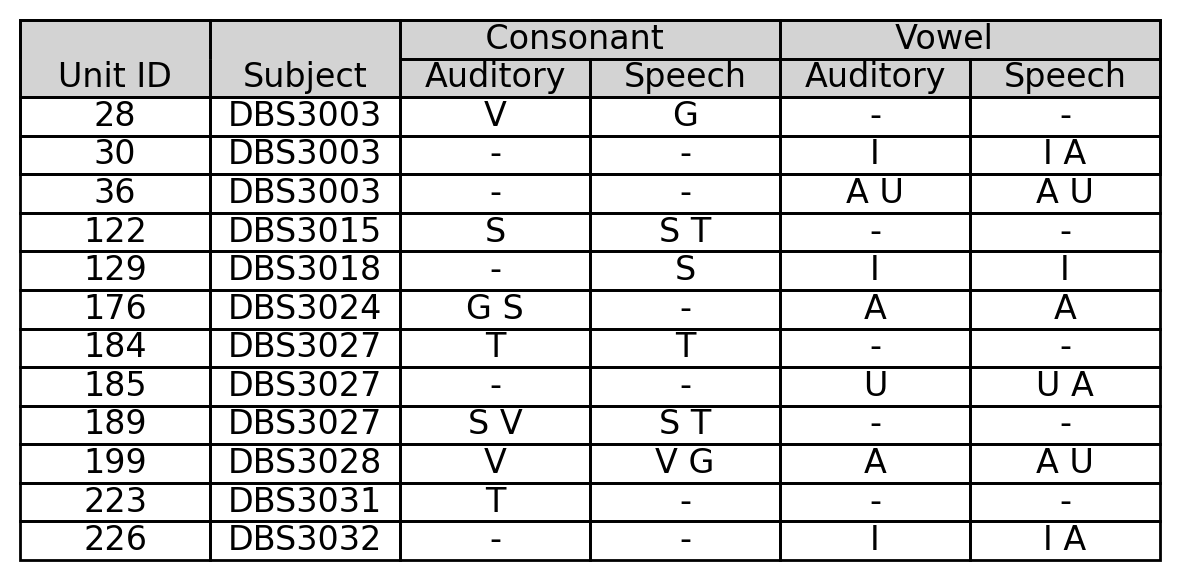

In [87]:
fig, axs = plt.subplots(1, 1, figsize=(6, 3), dpi=200, constrained_layout=True)
# hide axes
fig.patch.set_visible(False)
axs.axis('off')
axs.axis('tight')
fig.tight_layout()

r,c = summary_table.shape

# ensure consistent background color
axs.table(cellColours=[['lightgray']] + [['none']], bbox=[0,5/7,1,2/7])


#table = axs.table(cellText=summary_table.values, colLabels=summary_table.columns, loc='center')

table = axs.table(cellText=np.vstack([['', '', '               Consonant', '', '             Vowel', ''], 
                                      summary_table.columns, summary_table.values]), 
                 cellColours=[['none']*c]*(2 + r), bbox=[0, 0, 1, 1], cellLoc='center')


table.auto_set_font_size(False)
table.set_fontsize(12)
#table.scale(1, 1)
mergecells(table, (1,0), (0,0))
mergecells(table, (1,1), (0,1))
mergecells(table, (0,2), (0,3))
mergecells(table, (0,4), (0,5))

cells = table.properties()["celld"]
for i in range(0, 10):
     cells[i, 5].set_text_props(ha="center")
        
        
plt.show();

In [116]:
summary_table = pd.read_csv("cue_speech_encoding_unit_label.csv")
summary_table = summary_table.rename(columns={'Auditory.1': 'Auditory', 'Speech.1': 'Speech'})

summary_table

,Unit ID,Subject,Auditory,Speech,Auditory,Speech
0,28,DBS3003,V,G,-,-
1,30,DBS3003,-,-,I,I A
2,36,DBS3003,-,-,A U,A U
3,122,DBS3015,S,S T,-,-
4,129,DBS3018,-,S,I,I
5,176,DBS3024,G S,-,A,A
6,184,DBS3027,T,T,-,-
7,185,DBS3027,-,-,U,U A
8,189,DBS3027,S V,S T,-,-
9,199,DBS3028,V,V G,A,A U


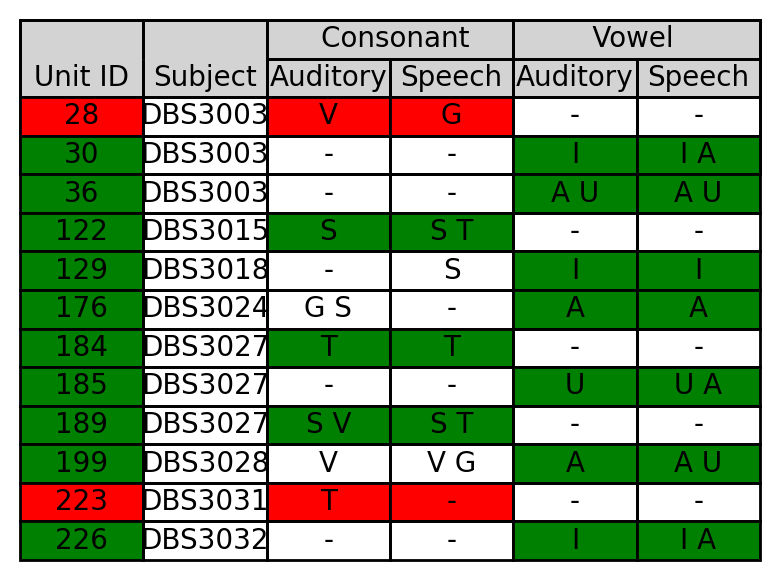

In [115]:
fig, axs = plt.subplots(1, 1, figsize=(4, 3), dpi=200, constrained_layout=True)
# hide axes
fig.patch.set_visible(False)
axs.axis('off')
axs.axis('tight')
fig.tight_layout()

r,c = summary_table.shape

# ensure consistent background color
axs.table(cellColours=[['lightgray']] + [['none']], bbox=[0,5/7,1,2/7])


#table = axs.table(cellText=summary_table.values, colLabels=summary_table.columns, loc='center')

table = axs.table(cellText=np.vstack([['', '', '               Consonant', '', '             Vowel', ''], 
                                      summary_table.columns, summary_table.values]), 
                 cellColours=[['none']*c]*(2 + r), bbox=[0, 0, 1, 1], cellLoc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
#table.scale(1, 1)
mergecells(table, (1,0), (0,0))
mergecells(table, (1,1), (0,1))
mergecells(table, (0,2), (0,3))
mergecells(table, (0,4), (0,5))

cells = table.properties()["celld"]
for i in range(0, 10):
     cells[i, 5].set_text_props(ha="center")
        

inconsistent_unit = [(2, 0), (2, 2), (2, 3), (12, 0), (12, 2), (12, 3)]
for item in range(len(inconsistent_unit)):
    cell = table[inconsistent_unit[item]]
    cell.set_facecolor('red')
        
consistent_unit = [(3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (13, 0)]
for item in range(len(consistent_unit)):
    cell = table[consistent_unit[item]]
    cell.set_facecolor('green')
    
consistent_unit = [(3, 4), (4, 4), (5, 2), (6, 4), (7, 4), (8, 2), (9, 4), (10, 2), (11, 4), (13, 4)]
for item in range(len(consistent_unit)):
    cell = table[consistent_unit[item]]
    cell.set_facecolor('green')
    
consistent_unit = [(3, 5), (4, 5), (5, 3), (6, 5), (7, 5), (8, 3), (9, 5), (10, 3), (11, 5), (13, 5)]
for item in range(len(consistent_unit)):
    cell = table[consistent_unit[item]]
    cell.set_facecolor('green')
        
plt.show();

In [117]:
summary_table = pd.read_csv("cue_speech_encoding_unit_label.csv")
summary_table = summary_table.rename(columns={'Auditory.1': 'Auditory', 'Speech.1': 'Speech'})
summary_table = summary_table.drop('Subject', axis=1)
summary_table

,Unit ID,Auditory,Speech,Auditory,Speech
0,28,V,G,-,-
1,30,-,-,I,I A
2,36,-,-,A U,A U
3,122,S,S T,-,-
4,129,-,S,I,I
5,176,G S,-,A,A
6,184,T,T,-,-
7,185,-,-,U,U A
8,189,S V,S T,-,-
9,199,V,V G,A,A U


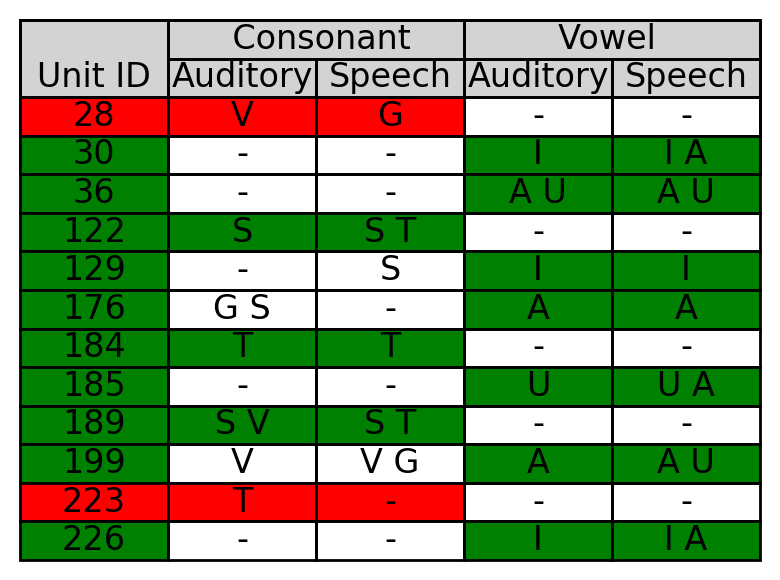

In [125]:
fig, axs = plt.subplots(1, 1, figsize=(4, 3), dpi=200, constrained_layout=True)
# hide axes
fig.patch.set_visible(False)
axs.axis('off')
axs.axis('tight')
fig.tight_layout()

r,c = summary_table.shape

# ensure consistent background color
axs.table(cellColours=[['lightgray']] + [['none']], bbox=[0,5/7,1,2/7])


#table = axs.table(cellText=summary_table.values, colLabels=summary_table.columns, loc='center')

table = axs.table(cellText=np.vstack([['', '               Consonant', '', '             Vowel', ''], 
                                      summary_table.columns, summary_table.values]), 
                 cellColours=[['none']*c]*(2 + r), bbox=[0, 0, 1, 1], cellLoc='center')


table.auto_set_font_size(False)
table.set_fontsize(12)
#table.scale(1, 1)
mergecells(table, (1,0), (0,0))
#mergecells(table, (1,1), (0,1))
mergecells(table, (0,1), (0,2))
mergecells(table, (0,3), (0,4))

cells = table.properties()["celld"]
for i in range(0, 10):
     cells[i, 4].set_text_props(ha="center")
        

inconsistent_unit = [(2, 0), (2, 1), (2, 2), (12, 0), (12, 1), (12, 2)]
for item in range(len(inconsistent_unit)):
    cell = table[inconsistent_unit[item]]
    cell.set_facecolor('red')
        
consistent_unit = [(3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (13, 0)]
for item in range(len(consistent_unit)):
    cell = table[consistent_unit[item]]
    cell.set_facecolor('green')
    
consistent_unit = [(3, 3), (4, 3), (5, 1), (6, 3), (7, 3), (8, 1), (9, 3), (10, 1), (11, 3), (13, 3)]
for item in range(len(consistent_unit)):
    cell = table[consistent_unit[item]]
    cell.set_facecolor('green')
    
consistent_unit = [(3, 4), (4, 4), (5, 2), (6, 4), (7, 4), (8, 2), (9, 4), (10, 2), (11, 4), (13, 4)]
for item in range(len(consistent_unit)):
    cell = table[consistent_unit[item]]
    cell.set_facecolor('green')
        
plt.show();

In [97]:
inconsistent_unit[0]

(2, 2)